In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import copy
import gdown

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import copy
import gdown

train_df = pd.read_pickle('./train_data.pickle')
train_df.info()

(400000, 6)

In [3]:
train_df

,start,moves,steps,solution,score,accepted_pair
269056,"[TAAGT---, AAGTT---, AAGCT---, CCCGT---, AATAT...","[B0+;3077, C0+;528, E0+;1132, F4+;4288, D4+;14...","[(2, 0), (3, 0), (5, 0), (6, 4), (4, 4), (1, 4)]","[TAAG-T, -AAGTT, -AAGCT, CCCG-T, -AATAT, AAAC-T]",18.0,"[(T, G), (-, T), (A, C), (A, C), (A, C), (G, T..."
499174,"[GCAATT--, GGAACT--, GCAATT--, CCAATC--, CCAGC...","[A3+;10686, B3+;465, D3+;707, C3+;665, F3+;156...","[(1, 3), (2, 3), (4, 3), (3, 3), (6, 3), (5, 5...","[GCA-A-TT, G-GAACT, GCA-A-TT, CC-A-ATC, CCAGC-...",26.0,"[(-, C), (C, T), (C, T), (C, G), (A, C), (A, C..."
85143,"[TTGA----, TGAG----, AAG-----, GTGA----, TGG--...","[C1+;13838, A0+;8192, D2+;11987]","[(3, 1), (1, 0), (4, 2)]","[-TTGA, TGAG, A-AG, GT-GA, TGG, TCGA]",15.0,"[(G, T), (T, G), (A, T), (G, T), (-, T), (-, G..."
260335,"[TACCTC------, GAACGC------, GGCAC-------, AGG...","[D0+;9860, F0+;4104, F1+;1535, G0+;3771, I0+;4...","[(4, 0), (6, 0), (6, 1), (7, 0), (9, 0)]","[TACCTC, GAACGC, GGCAC, -AGGTCC, AAAAGC, --GGT...",49.0,"[(-, C), (A, C), (A, G), (G, A), (-, T), (-, G..."
338124,"[GGAA---, ATAAA--, ATAAA--, GCAC---, TGAA---, ...","[B2+;12844, D2+;1042, C2+;1533, E2+;1442]","[(2, 2), (4, 2), (3, 2), (5, 2)]","[GGAA, AT-AAA, AT-AAA, GC-AC, TG-AA, AATA]",11.0,"[(C, T), (C, T), (T, G), (-, T), (A, C), (A, C..."
...,...,...,...,...,...,...
259178,"[TGGC---, TCCC---, CTCC---, CGTA---, GTGT---, ...","[C0+;4072, E0+;1769, C1+;2435, B1+;1018]","[(3, 0), (5, 0), (3, 1), (2, 1)]","[TGGC, T-CCC, --CTCC, CGTA, -GTGT, GGTAG]",12.0,"[(A, T), (A, G), (G, A), (T, G), (T, C), (T, G..."
365838,"[TCATAGCCT---, TCATAGGGC---, TCAATTTTT---, TCA...","[C2+;16917, D2+;1552, F5+;17050, B5+;11445, A8...","[(3, 2), (4, 2), (6, 5), (2, 5), (1, 8), (5, 8...","[TCATAGCC-T, TCATA-GGGC, TC-AATTTTT, TC-AAGATT...",43.0,"[(G, A), (-, C), (T, G), (C, T), (A, C), (-, T..."
131932,"[CAGT---, TAGT---, GCTT---, AAGT---, GAGT---, ...","[A0+;11501, B0+;1750]","[(1, 0), (2, 0)]","[-CAGT, -TAGT, GCTT, AAGT, GAGT, GGGC]",15.0,"[(G, A), (T, G), (G, A), (A, G), (G, T), (-, C..."
146867,"[TTTG---, GAAG---, GAGG---, GATG---, GTT----, ...","[A0+;4807, B1+;3803, C1+;4005, C2+;3369, D2+;2...","[(1, 0), (2, 1), (3, 1), (3, 2), (4, 2), (4, 2...","[-TTTG, GA-AG, G--AGG, GA-TG, GTT, A--A-CC]",19.0,"[(-, G), (-, T), (G, T), (A, T), (T, G), (G, T..."


In [4]:
DICT_SYMBOLS = {
    'A': 1,
    'T': 2,
    'C': 3,
    'G': 4}

In [5]:
class Puzzle:
    def __init__(self, data):
        self.start = list(data["start"])
        self.moves = copy.deepcopy(data.get("moves"))
        self.steps = copy.deepcopy(data.get("steps"))
        self.solution = list(data["solution"])
        self.score = data["score"]
        self.accepted_pair = data["accepted_pair"]

        self.padded_start = self.build_puzzle_to_end(self.start)
        self.padded_solution = self.build_puzzle_to_end(self.solution)

    def build_puzzle_to_end(self, puzzle):
        """Pad each row with '-' to match the longest row for visualization."""
        max_len = max(len(row) for row in puzzle)
        return [row.ljust(max_len, '-') for row in puzzle]

    def plot_puzzle(self, puzzle, title):
        puzzle = self.build_puzzle_to_end(puzzle)
        num_puzzle = np.array([[DICT_SYMBOLS.get(char, 0) for char in row] for row in puzzle])
        rot_num_puzzle = np.rot90(num_puzzle, 1)
        puzzle_array = np.array([list(row) for row in puzzle])
        rot_labels = np.rot90(puzzle_array, 1)

        plt.figure(figsize=(8, 6))
        sns.heatmap(rot_num_puzzle, annot=rot_labels, fmt="", cmap="Pastel1_r", cbar=False)
        plt.title(title)
        plt.axis("off")
        plt.show()

    def gearbox_score(self, puzzle, bonus=1.15):
        consensus = self.accepted_pair
        score = 0
        for col_ind in range(len(puzzle[0])):
            col_bonus = True
            col_tot = 0
            column_chars = [row[col_ind] for row in puzzle]
            for char in column_chars:
                if char == "-":
                    col_bonus = False
                    continue
                if char in consensus[col_ind]:
                    col_tot += 1
                else:
                    col_bonus = False
            column_score = col_tot * bonus if col_bonus else col_tot
            score += column_score
        print(f"Total Gearbox Score: {score}")
        return score

    def _apply_step_to_puzzle(self, puzzle, step):
        """Apply a single step to the puzzle."""
        new_puzzle = puzzle.copy()
        row_index = step[0] - 1
        col_index = step[1]
        if row_index < 0 or row_index >= len(new_puzzle):
            return new_puzzle
        row_str = new_puzzle[row_index]
        if col_index < 0 or col_index > len(row_str):
            return new_puzzle
        new_row = row_str[:col_index] + '-' + row_str[col_index:]
        new_row = new_row[:len(row_str)]
        new_puzzle[row_index] = new_row
        return new_puzzle

    def apply_all_steps(self):
        """Apply all steps on a copy of the puzzle and plot states."""
        current_puzzle = list(self.start)
        updated_puzzles = []
        scores = []

        for step in self.steps:
            current_puzzle = self._apply_step_to_puzzle(current_puzzle, step)
            padded_current = self.build_puzzle_to_end(current_puzzle)
            score = self.gearbox_score(padded_current)
            updated_puzzles.append(padded_current)
            scores.append(score)

        n_steps = len(updated_puzzles)
        fig, axes = plt.subplots(1, n_steps, figsize=(4 * n_steps, 6))
        if n_steps == 1:
            axes = [axes]
        for idx, (puzzle_state, score) in enumerate(zip(updated_puzzles, scores)):
            num_puzzle = np.array([[DICT_SYMBOLS.get(char, 0) for char in row] for row in puzzle_state])
            rot_num_puzzle = np.rot90(num_puzzle, 1)
            puzzle_array = np.array([list(row) for row in puzzle_state])
            rot_labels = np.rot90(puzzle_array, 1)
            ax = axes[idx]
            sns.heatmap(rot_num_puzzle, annot=rot_labels, fmt="", cmap="Pastel1_r", cbar=False, ax=ax)
            ax.set_title(f"Step {idx+1}\nScore: {score}")
            ax.axis("off")
        plt.tight_layout()
        plt.show()
        return current_puzzle

In [6]:
# Create puzzle
puzzle_data = {
    'start': train_df.iloc[-1]['start'],
    'moves': train_df.iloc[-1].get('moves'),
    'steps': train_df.iloc[-1].get('steps'),
    'solution': train_df.iloc[-1]['solution'],
    'score': train_df.iloc[-1]['score'],
    'accepted_pair': train_df.iloc[-1]['accepted_pair']
}

puzzle = Puzzle(puzzle_data)

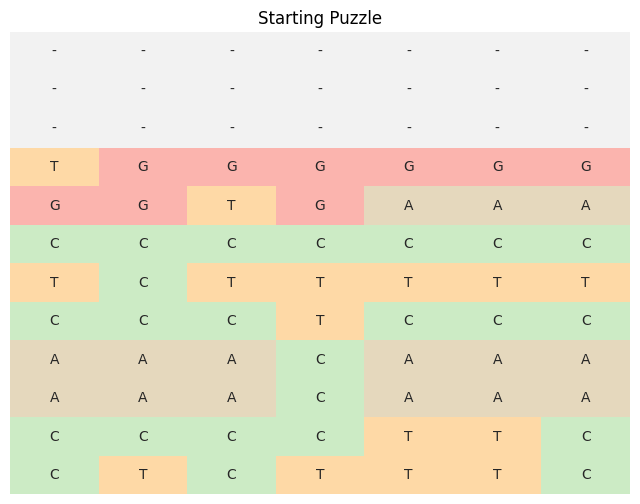

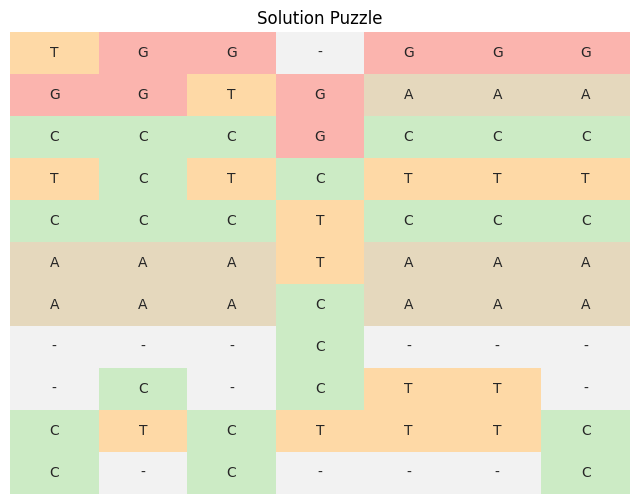

In [7]:
puzzle.plot_puzzle(puzzle.start, "Starting Puzzle")
puzzle.plot_puzzle(puzzle.solution, "Solution Puzzle")


Total Gearbox Score: 33.099999999999994
Total Gearbox Score: 37.15
Total Gearbox Score: 41.15
Total Gearbox Score: 45.14999999999999
Total Gearbox Score: 47.14999999999999
Total Gearbox Score: 50.14999999999999
Total Gearbox Score: 55.249999999999986
Total Gearbox Score: 56.249999999999986
Total Gearbox Score: 58.249999999999986
Total Gearbox Score: 59.249999999999986
Total Gearbox Score: 59.19999999999999
Total Gearbox Score: 60.19999999999999
Total Gearbox Score: 61.19999999999999


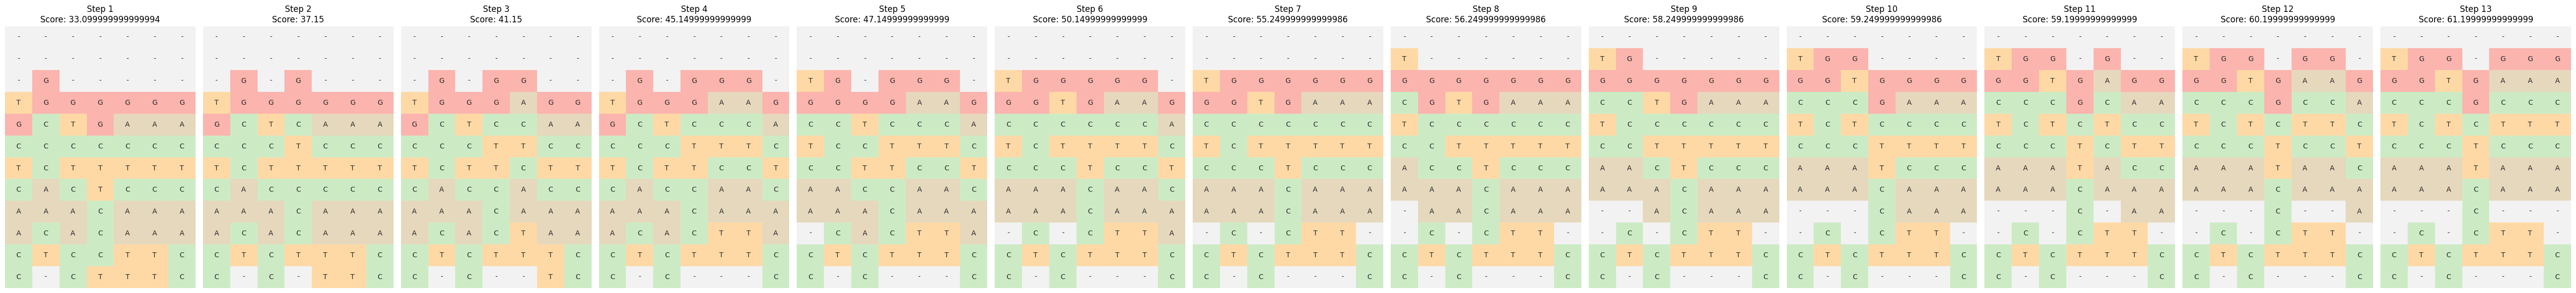

In [8]:
updated_puzzle = puzzle.apply_all_steps()

In [9]:
puzzle.steps

[(2, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (1, 2),
 (3, 2),
 (7, 2),
 (1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (6, 3),
 (7, 3)]

## Training the model

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import copy
import gdown

train_data = pd.read_pickle('./train_data.pickle')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400000 entries, 269056 to 121958
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   start          400000 non-null  object 
 1   moves          400000 non-null  object 
 2   steps          399997 non-null  object 
 3   solution       400000 non-null  object 
 4   score          400000 non-null  float64
 5   accepted_pair  400000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 21.4+ MB


In [1]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

model_name = "google/flan-t5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [21]:
from datasets import load_from_disk
dataset = load_from_disk("./preprocessed_dataset")


In [27]:
tokenizer.decode(dataset[0]['input_ids'])

'Align DNA sequences: 0: TAAGT--- 1: AAGTT--- 2: AAGCT--- 3: CCCGT--- 4: AATAT--- 5: AAACT---</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>'

In [17]:
from datasets import Dataset 

dataset = Dataset.from_pandas(train_data)
dataset

Dataset({
    features: ['start', 'moves', 'steps', 'solution', 'score', 'accepted_pair', '__index_level_0__'],
    num_rows: 400000
})

In [18]:
dataset = dataset.filter(lambda example: all(value is not None for value in example.values()))


Filter:   0%|          | 0/400000 [00:00<?, ? examples/s]

In [22]:
dataset

Dataset({
    features: ['start', 'moves', 'steps', 'solution', 'score', 'accepted_pair', '__index_level_0__'],
    num_rows: 399997
})

In [23]:
def preprocess_function(example):
    input_text = 'Align DNA sequences:\n' + '\n'.join([
        f'{i}: {seq}' for i, seq in enumerate(example['start'])
    ])
    target_text = ", ".join(
        str(step) for step in example['steps']
    )

    # Tokenize input and target
    tokenized_inputs = tokenizer(
        input_text, padding="max_length", truncation=True, max_length=512
    )
    tokenized_targets = tokenizer(
        target_text, padding="max_length", truncation=True, max_length=128
    )

    return {
        "input_text": input_text,
        "target": target_text,
        "input_ids": tokenized_inputs["input_ids"],
        "attention_mask": tokenized_inputs["attention_mask"],
        "labels": tokenized_targets["input_ids"],
    }

In [37]:
def format_label(examples):
    target_texts = [
        ", ".join(str(step) for step in steps) for steps in examples["steps"]
    ]

    for target in target_texts:
        print(target)

format_label(dataset.select(range(50)))

[2, 0], [3, 0], [5, 0], [6, 4], [4, 4], [1, 4]
[1, 3], [2, 3], [4, 3], [3, 3], [6, 3], [5, 5], [1, 5], [3, 5], [2, 1], [2, 2], [4, 2]
[3, 1], [1, 0], [4, 2]
[4, 0], [6, 0], [6, 1], [7, 0], [9, 0]
[2, 2], [4, 2], [3, 2], [5, 2]
[1, 0], [9, 4], [10, 4], [14, 4]
[7, 7], [7, 8], [8, 7], [8, 8], [7, 9], [17, 2], [17, 3], [17, 4], [17, 6], [10, 5], [10, 7]
[3, 2], [5, 2], [7, 2], [7, 3], [3, 4], [5, 5], [7, 6], [6, 6], [2, 8]
[1, 1], [1, 2], [2, 2], [3, 1], [3, 2], [4, 2], [6, 2]
[5, 0], [6, 0], [6, 0], [6, 1], [6, 3], [6, 2], [6, 3], [4, 1], [4, 1], [4, 3]
[2, 2], [2, 2], [3, 2], [4, 2], [5, 2], [6, 2], [2, 7], [2, 8], [4, 8], [6, 7], [7, 7], [8, 6], [9, 6], [10, 6], [11, 6]
[2, 1], [3, 1], [4, 1], [5, 5], [6, 5], [1, 3], [6, 1], [4, 4], [4, 5]
[1, 3], [2, 3], [5, 3], [4, 4], [3, 4]
[9, 0], [8, 0], [1, 0], [2, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [8, 0], [9, 0], [8, 1], [3, 0], [8, 5]
[1, 2], [2, 3], [3, 3], [4, 3], [6, 1], [6, 2], [3, 1]
[1, 0], [2, 0], [4, 0], [6, 0], [6, 0], [6, 1

In [23]:
def preprocess_function(examples):
    # Process input_text for batch
    input_texts = [
        "Align DNA sequences:\n" + "\n".join(
            f"{i}: {seq}" for i, seq in enumerate(start)
        ) for start in examples["start"]
    ]

    # Process target_text for batch
    target_texts = [
        ", ".join(str(step) for step in steps) for steps in examples["steps"]
    ]

    # Tokenize inputs and targets
    model_inputs = tokenizer(
        input_texts, padding="longest", truncation=True, max_length=512
    )
    labels = tokenizer(
        target_texts, padding="longest", truncation=True, max_length=128
    )

    # Add labels to model_inputs
    model_inputs["labels"] = labels["input_ids"]

    return model_inputs


In [24]:
dataset = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/399997 [00:00<?, ? examples/s]

In [25]:
dataset.save_to_disk('preprocessed_dataset')

Saving the dataset (0/3 shards):   0%|          | 0/399997 [00:00<?, ? examples/s]

In [4]:
from datasets import load_from_disk
dataset = load_from_disk('preprocessed_dataset')
subset_dataset = dataset.shuffle(seed=42).select(range(100000))

train_test_split = dataset.train_test_split(test_size=5000, seed=42)
train_dataset = train_test_split["train"]
test_dataset = train_test_split["test"]

In [4]:
import torch
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer, DataCollatorForSeq2Seq, AutoTokenizer

# Define the data collator for padding sequences dynamically
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

# Define training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="./t5-dna-align",      # Save model here
    
    logging_dir="./logs",             # TensorBoard log directory
    logging_strategy="steps",         # Log after every few steps
    logging_steps=50,                 # Log every 50 steps
    report_to="tensorboard",          # Report logs to TensorBoard

    evaluation_strategy="steps",
    eval_steps=200,  # Evaluate every 100 steps

    per_device_train_batch_size=50,   # Adjust based on GPU memory
    per_device_eval_batch_size=50,
    learning_rate=3e-5,               # Adjust based on experiments
    weight_decay=0.01,                # L2 regularization
    num_train_epochs=3,               # Number of training epochs
    save_total_limit=2,               # Keep last 2 checkpoints
    predict_with_generate=True,       # Important for seq2seq models
)

# Initialize Trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_test_split["train"],
    eval_dataset=train_test_split["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
)

c:\Users\dante\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\dante\AppData\Local\Temp\ipykernel_16072\2371271249.py:29: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


In [5]:
trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss,Validation Loss
200,2.119600,1.535904
400,0.691300,0.421709
600,0.379700,0.322983
800,0.335800,0.305460
1000,0.326500,0.298106
1200,0.316300,0.296329
1400,0.315400,0.290162
1600,0.311300,0.287208
1800,0.309900,0.284642
2000,0.290600,0.284371


: 

In [ ]:

# Train the model
trainer.train()

In [1]:
from transformers import T5ForConditionalGeneration, AutoTokenizer

# Path to the checkpoint folder (e.g., after a saved training run)
checkpoint_path = "./t5-dna-align/checkpoint-5500"  # Change to your actual checkpoint path

# Load model from checkpoint
model = T5ForConditionalGeneration.from_pretrained(checkpoint_path)

# Load tokenizer (should match the model)
tokenizer = AutoTokenizer.from_pretrained(checkpoint_path)


You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


In [2]:
from datasets import load_from_disk
dataset = load_from_disk('preprocessed_dataset')

In [3]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import copy

DICT_SYMBOLS = {
    'A': 1,
    'T': 2,
    'C': 3,
    'G': 4}

class Puzzle:
    def __init__(self, data):
        self.start = list(data["start"])
        self.moves = copy.deepcopy(data.get("moves"))
        self.steps = copy.deepcopy(data.get("steps"))
        self.solution = list(data["solution"])
        self.score = data["score"]
        self.accepted_pair = data["accepted_pair"]

        self.padded_start = self.build_puzzle_to_end(self.start)
        self.padded_solution = self.build_puzzle_to_end(self.solution)

    def build_puzzle_to_end(self, puzzle):
        """Pad each row with '-' to match the longest row for visualization."""
        max_len = max(len(row) for row in puzzle)
        return [row.ljust(max_len, '-') for row in puzzle]

    def plot_puzzle(self, puzzle, title):
        puzzle = self.build_puzzle_to_end(puzzle)
        num_puzzle = np.array([[DICT_SYMBOLS.get(char, 0) for char in row] for row in puzzle])
        rot_num_puzzle = np.rot90(num_puzzle, 1)
        puzzle_array = np.array([list(row) for row in puzzle])
        rot_labels = np.rot90(puzzle_array, 1)

        plt.figure(figsize=(8, 6))
        sns.heatmap(rot_num_puzzle, annot=rot_labels, fmt="", cmap="Pastel1_r", cbar=False)
        plt.title(title)
        plt.axis("off")
        plt.show()

    def gearbox_score(self, puzzle, bonus=1.15):
        consensus = self.accepted_pair
        score = 0
        for col_ind in range(len(puzzle[0])):
            col_bonus = True
            col_tot = 0
            column_chars = [row[col_ind] for row in puzzle]
            for char in column_chars:
                if char == "-":
                    col_bonus = False
                    continue
                if char in consensus[col_ind]:
                    col_tot += 1
                else:
                    col_bonus = False
            column_score = col_tot * bonus if col_bonus else col_tot
            score += column_score
        # print(f"Total Gearbox Score: {score}")
        return score

    def _apply_step_to_puzzle(self, puzzle, step):
        """Apply a single step to the puzzle."""
        new_puzzle = puzzle.copy()
        row_index = step[0] - 1
        col_index = step[1]
        if row_index < 0 or row_index >= len(new_puzzle):
            return new_puzzle
        row_str = new_puzzle[row_index]
        if col_index < 0 or col_index > len(row_str):
            return new_puzzle
        new_row = row_str[:col_index] + '-' + row_str[col_index:]
        new_row = new_row[:len(row_str)]
        new_puzzle[row_index] = new_row
        return new_puzzle

    def apply_all_steps(self):
        """Apply all steps on a copy of the puzzle and plot states."""
        current_puzzle = list(self.start)
        updated_puzzles = []
        scores = []

        for step in self.steps:
            current_puzzle = self._apply_step_to_puzzle(current_puzzle, step)
            padded_current = self.build_puzzle_to_end(current_puzzle)
            score = self.gearbox_score(padded_current)
            updated_puzzles.append(padded_current)
            scores.append(score)

        n_steps = len(updated_puzzles)
        # fig, axes = plt.subplots(1, n_steps, figsize=(4 * n_steps, 6))
        if n_steps == 1:
            axes = [axes]
        for idx, (puzzle_state, score) in enumerate(zip(updated_puzzles, scores)):
            num_puzzle = np.array([[DICT_SYMBOLS.get(char, 0) for char in row] for row in puzzle_state])
            rot_num_puzzle = np.rot90(num_puzzle, 1)
            puzzle_array = np.array([list(row) for row in puzzle_state])
            rot_labels = np.rot90(puzzle_array, 1)
            # ax = axes[idx]
            # sns.heatmap(rot_num_puzzle, annot=rot_labels, fmt="", cmap="Pastel1_r", cbar=False, ax=ax)
            # ax.set_title(f"Step {idx+1}\nScore: {score}")
            # ax.axis("off")
            
        # plt.tight_layout()
        # plt.show()
        return current_puzzle, scores

In [4]:
import re
import ast

def generate_steps(start):
    input_text = "Align DNA sequences:\n" + "\n".join(f"{i}: {seq}" for i, seq in enumerate(start))
    inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True)

    # Generate output
    output_ids = model.generate(inputs["input_ids"], temperature=0, max_length=512)
    output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    # Remove the trailing incomplete part
    s = output_text.rstrip(", '[")  # Remove unfinished elements at the end
    # Use regex to extract all tuples
    matches = re.findall(r"\[(\d+),\s*(\d+)\]", s)

    # Convert matches into a list of tuples
    tuple_list = [[int(x), int(y)] for x, y in matches]

    # Output the parsed list
    return tuple_list

steps = generate_steps(dataset[0]['start'])

c:\Users\dante\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\generation\configuration_utils.py:629: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


In [13]:
import random 

def get_scores(index):
    reference_score = dataset[index]['score']
    steps = generate_steps(dataset[index]['start'])

    puzzle_data = {
        'start': dataset[index]['start'],
        'moves': dataset[index]['moves'],
        'steps': steps,
        'solution': dataset[index]['solution'],
        'score': dataset[index]['score'],
        'accepted_pair': dataset[index]['accepted_pair']
    }

    puzzle = Puzzle(puzzle_data)
    updated_puzzle, scores = puzzle.apply_all_steps()

    max_score = max(scores)
    max_index = scores.index(max_score)
    best_steps = steps[:max_index]

    print(f'max score: {max_score}, ref_score: {reference_score}, best_steps: {best_steps}')
    return max_score, reference_score, best_steps


random_indices = random.sample(range(len(dataset)), 200)

max_scores, reference_scores = [], []

for i in random_indices:
    max_score, reference_score, _ = get_scores(i)
    max_scores.append(max_score)
    reference_scores.append(reference_score)



c:\Users\dante\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\generation\configuration_utils.py:629: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


max score: 49.65, ref_score: 57.0, best_steps: [[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0]]
max score: 36.099999999999994, ref_score: 32.0, best_steps: [[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [1, 4], [2, 4], [3, 4], [4, 4], [5, 4], [6, 4]]
max score: 14, ref_score: 17.0, best_steps: []
max score: 19, ref_score: 17.0, best_steps: [[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [1, 3], [2, 3], [3, 3], [4, 3], [5, 3]]
max score: 57.15, ref_score: 62.0, best_steps: [[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0]]
max score: 29.099999999999998, ref_score: 32.0, best_steps: [[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [1, 5], [2, 5], [3, 5], [4, 5], [5, 5], [6, 5]]
max score: 30, ref_score: 40.0, best_steps: [[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [1, 5], [2, 5], [3, 5], [4, 5], [5, 5], [6, 5]]
max score: 16, ref_score: 16.0, best_steps: [[1, 0], [2, 0], [3, 0]]
max score: 13, ref_score: 12.0, best_steps: [[1, 0], [2,

: 

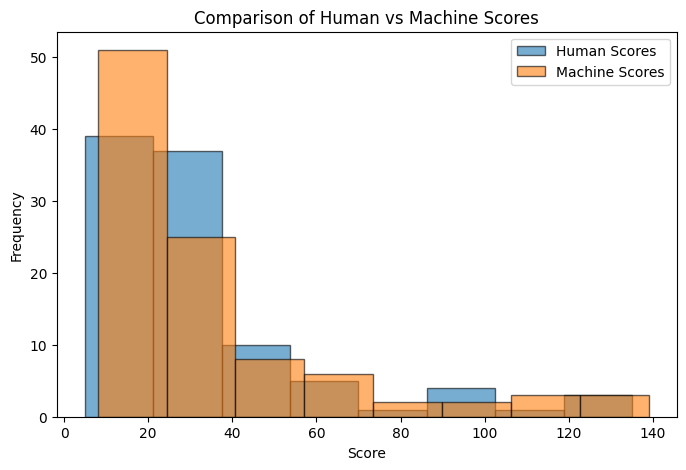

In [ ]:
arr= np.arange(0 , 200)


# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(max_scores, bins=8, alpha=0.6, label="Human Scores", edgecolor="black")
plt.hist(reference_scores, bins=8, alpha=0.6, label="Machine Scores", edgecolor="black")

# Labels and Title
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Comparison of Human vs Machine Scores")
plt.legend()

# Show plot
plt.show()

In [ ]:
sum = 0

for i in range(200):
    sum += (reference_score - max_score)/reference_score * 100

sum/200

-11.249999999999993

Total Gearbox Score: 12
Total Gearbox Score: 12
Total Gearbox Score: 15
Total Gearbox Score: 16
Total Gearbox Score: 19
Total Gearbox Score: 19
Total Gearbox Score: 19
Total Gearbox Score: 19
Total Gearbox Score: 17
Total Gearbox Score: 19
Total Gearbox Score: 19
Total Gearbox Score: 17
Total Gearbox Score: 18
Total Gearbox Score: 18
Total Gearbox Score: 16
Total Gearbox Score: 16
Total Gearbox Score: 15
Total Gearbox Score: 15
Total Gearbox Score: 15
Total Gearbox Score: 15
Total Gearbox Score: 15
Total Gearbox Score: 15
Total Gearbox Score: 15
Total Gearbox Score: 15
Total Gearbox Score: 15
Total Gearbox Score: 15
Total Gearbox Score: 15
Total Gearbox Score: 15
Total Gearbox Score: 15
Total Gearbox Score: 14
Total Gearbox Score: 14


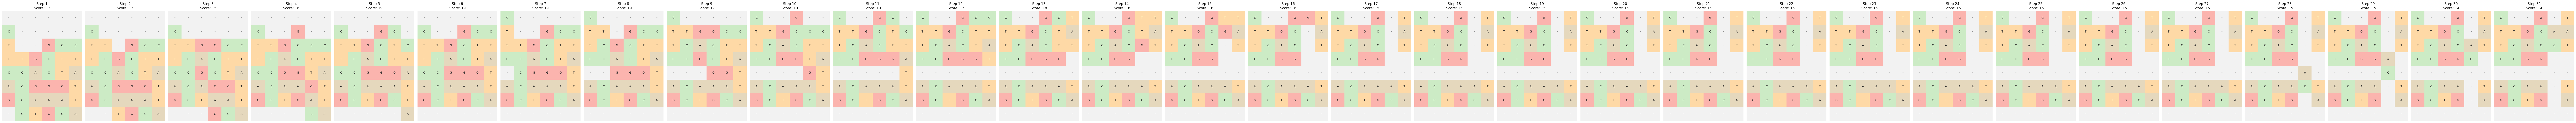

17.0


In [41]:

index = 23

steps = generate_steps(dataset[index]['start'])

puzzle_data = {
    'start': dataset[index]['start'],
    'moves': dataset[index]['moves'],
    'steps': steps,
    'solution': dataset[index]['solution'],
    'score': dataset[index]['score'],
    'accepted_pair': dataset[index]['accepted_pair']
}

puzzle = Puzzle(puzzle_data)
updated_puzzle = puzzle.apply_all_steps()

print(dataset[index]['score'])

In [36]:
dataset[0]['score']

18.0

## Training with Qwen2.5

In [1]:
from transformers import AutoTokenizer, AutoModelForCausalLM

model_name = "Qwen/Qwen2.5-0.5B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(model_name, device_map="auto")

Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


In [2]:
import pandas as pd
from datasets import Dataset

data = pd.read_pickle('./train_data.pickle')
dataset = Dataset.from_pandas(data).shuffle(seed=42).select(range(100000))

def preprocess_function(examples):
    # Process input_text for batch
    inputs = ["Align DNA sequences:\n" + "\n".join(f"{i}: {seq}" for i, seq in enumerate(start)) for start in examples["start"]]
    # Process target_text for batch
    targets = [", ".join(str(step) for step in steps) for steps in examples["steps"]]

    # Concatenate input and target (CausalLM training)
    full_texts = [inp + "\n\n" + tgt for inp, tgt in zip(inputs, targets)]

    # Tokenize entire input-output sequence
    model_inputs = tokenizer(full_texts, padding="max_length", truncation=True, max_length=128)
    
    return model_inputs

dataset = dataset.filter(lambda example: all(value is not None for value in example.values()))
dataset = dataset.map(preprocess_function, batched=True)

Filter:   0%|          | 0/100000 [00:00<?, ? examples/s]

Map:   0%|          | 0/99999 [00:00<?, ? examples/s]

In [3]:
dataset.save_to_disk('preprocessed_subset')

Saving the dataset (0/1 shards):   0%|          | 0/99999 [00:00<?, ? examples/s]

In [2]:
from datasets import load_from_disk
dataset = load_from_disk('preprocessed_subset')

In [3]:
train_test_split = dataset.train_test_split(test_size=10000, seed=42)
train_dataset = train_test_split["train"]
test_dataset = train_test_split["test"]

In [4]:
train_dataset, test_dataset

(Dataset({
     features: ['start', 'moves', 'steps', 'solution', 'score', 'accepted_pair', '__index_level_0__', 'input_ids', 'attention_mask'],
     num_rows: 89999
 }),
 Dataset({
     features: ['start', 'moves', 'steps', 'solution', 'score', 'accepted_pair', '__index_level_0__', 'input_ids', 'attention_mask'],
     num_rows: 10000
 }))

In [5]:
from transformers import TrainingArguments, Trainer, DataCollatorForLanguageModeling
from peft import LoraConfig, get_peft_model, TaskType


data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    pad_to_multiple_of=8,  # Helps with tensor efficiency
    return_tensors="pt",
    mlm=False
)

# Define LoRA configuration
lora_config = LoraConfig(
    r=16,  # Rank size
    lora_alpha=32,
    lora_dropout=0.1,
    bias="none",
    task_type=TaskType.CAUSAL_LM,  # Ensure it's set for CausalLM
)

training_args = TrainingArguments(
    output_dir="./qwen2.5-checkpoints",
    logging_dir="./qwen2.5-logs",       # TensorBoard log directory
    logging_strategy="steps",           # Log after every few steps
    logging_steps=100,                  # Log every 100 steps
    report_to="tensorboard",            # Report logs to TensorBoard

    evaluation_strategy="steps",
    eval_steps=100,                     # Evaluate every 200 steps

    save_strategy="steps",
    save_steps=100,
    
    per_device_train_batch_size=24,
    per_device_eval_batch_size=24,

    learning_rate=2e-5,
    weight_decay=0.01,

    gradient_accumulation_steps=8,      # Accumulate gradients to reduce memory usage
    num_train_epochs=3,
    fp16=True,
    gradient_checkpointing=True,        # Reduce memory usage

)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator
)

c:\Users\dante\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\dante\AppData\Local\Temp\ipykernel_18212\949893558.py:47: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [6]:
trainer.train()

`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.


Step,Training Loss,Validation Loss
100,0.901300,0.817944
200,0.795200,0.787717
300,0.774600,0.770050
400,0.758500,0.757847
500,0.747500,0.750123
600,0.734700,0.741800
700,0.726400,0.735583
800,0.719400,0.729904
900,0.716000,0.723949
1000,0.697700,0.722306


TrainOutput(global_step=1404, training_loss=0.7357440584065907, metrics={'train_runtime': 4765.7189, 'train_samples_per_second': 56.654, 'train_steps_per_second': 0.295, 'total_flos': 7.406807365681152e+16, 'train_loss': 0.7357440584065907, 'epoch': 2.994133333333333})

In [7]:
from transformers import AutoTokenizer, AutoModel

# Path to the checkpoint folder (e.g., after a saved training run)
checkpoint_path = "./qwen2.5-checkpoints/checkpoint-1404"  # Change to your actual checkpoint path

# Load model from checkpoint
model = AutoModelForCausalLM.from_pretrained(checkpoint_path)

# Load tokenizer (should match the model)
tokenizer = AutoTokenizer.from_pretrained(checkpoint_path)


In [21]:
from transformers import GenerationConfig

start = dataset[2]['start']
input_text = "Align DNA sequences:\n" + "\n".join(f"{i}: {seq}" for i, seq in enumerate(start))

input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to(model.device)

max_new_tokens = 128

# Set generation configuration
gen_config = GenerationConfig(
    max_new_tokens=max_new_tokens,
    temperature=0.7,  # Adjust for more/less randomness
    top_k=50,
    top_p=0.9,
    do_sample=True,
    repetition_penalty=1.1,
)


output_ids = model.generate(input_ids, generation_config=gen_config)

# Decode output
output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

# Extract only the moves from the output (remove the input prompt)
output_text.split("\n\n")[-1]  # Everything after input prompt



'[7, 0], [7, 1], [7, 2], [6, 2], [5, 2], [4, 2], [4, 2], [4, 3], [3, 2], [3, 3], [3, 4] [5, 8], [5, 9] [6, 8], [6, 9], [2, 7], [1, 7] [1, 8], [2, 8], [2, 9] [1, 9] ['